The dataset was released by Aspiring Minds from the Aspiring Mind Employment Outcome 2015 (AMEO). The study is primarily limited  only to students with engineering disciplines. The dataset contains the employment outcomes of engineering graduates as dependent variables (Salary, Job Titles, and Job Locations) along with the standardized scores from three different areas – cognitive skills, technical skills and personality skills. The dataset also contains demographic features. The dataset  contains  around  40 independent variables and 4000 data points. The independent variables are both continuous and categorical in nature.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 50)
from scipy.stats import chi2_contingency
import scipy.stats as stats
from scipy.stats import kruskal

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_excel('aspiring_minds_employability_outcomes_2015.xlsx')
data.head()

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.3,"board ofsecondary education,ap",2007,95.8,"board of intermediate education,ap",1141,2,B.Tech/B.E.,computer engineering,78.00,1141,0,Andhra Pradesh,2011,515,585,525,0.635979,445,-1,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.4,cbse,2007,85.0,cbse,5807,2,B.Tech/B.E.,electronics and communication engineering,70.06,5807,0,Madhya Pradesh,2012,695,610,780,0.960603,-1,466,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.0,cbse,2010,68.2,cbse,64,2,B.Tech/B.E.,information technology,70.00,64,0,Uttar Pradesh,2014,615,545,370,0.450877,395,-1,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.6,cbse,2007,83.6,cbse,6920,1,B.Tech/B.E.,computer engineering,74.64,6920,1,Delhi,2011,635,585,625,0.974396,615,-1,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.0,cbse,2008,76.8,cbse,11368,2,B.Tech/B.E.,electronics and communication engineering,73.90,11368,0,Uttar Pradesh,2012,545,625,465,0.124502,-1,233,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [3]:
df = data.copy()

In [4]:
df.shape

(3998, 39)

In [5]:
df.describe()

,ID,Salary,10percentage,12graduation,12percentage,CollegeID,CollegeTier,collegeGPA,CollegeCityID,CollegeCityTier,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
count,3.998000e+03,3.998000e+03,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000
mean,6.637945e+05,3.076998e+05,77.925443,2008.087544,74.466366,5156.851426,1.925713,71.486171,5156.851426,0.300400,2012.105803,501.649075,501.598799,513.378189,0.510490,353.102801,95.328414,90.742371,22.974737,16.478739,31.851176,2.683842,-0.037831,0.146496,0.002763,-0.169033,-0.138110
std,3.632182e+05,2.127375e+05,9.850162,1.653599,10.999933,4802.261482,0.262270,8.167338,4802.261482,0.458489,31.857271,104.940021,86.783297,122.302332,0.468671,205.355519,158.241218,175.273083,98.123311,87.585634,104.852845,36.658505,1.028666,0.941782,0.951471,1.007580,1.008075
min,1.124400e+04,3.500000e+04,43.000000,1995.000000,40.000000,2.000000,1.000000,6.450000,2.000000,0.000000,0.000000,180.000000,195.000000,120.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-4.126700,-5.781600,-4.600900,-2.643000,-7.375700
25%,3.342842e+05,1.800000e+05,71.680000,2007.000000,66.000000,494.000000,2.000000,66.407500,494.000000,0.000000,2012.000000,425.000000,445.000000,430.000000,0.342315,295.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.713525,-0.287100,-0.604800,-0.868200,-0.669200
50%,6.396000e+05,3.000000e+05,79.150000,2008.000000,74.400000,3879.000000,2.000000,71.720000,3879.000000,0.000000,2013.000000,500.000000,505.000000,515.000000,0.622643,415.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.046400,0.212400,0.091400,-0.234400,-0.094300
75%,9.904800e+05,3.700000e+05,85.670000,2009.000000,82.600000,8818.000000,2.000000,76.327500,8818.000000,1.000000,2014.000000,570.000000,565.000000,595.000000,0.842248,495.000000,233.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.702700,0.812800,0.672000,0.526200,0.502400
max,1.298275e+06,4.000000e+06,97.760000,2013.000000,98.700000,18409.000000,2.000000,99.930000,18409.000000,1.000000,2017.000000,875.000000,795.000000,900.000000,0.999910,840.000000,612.000000,715.000000,623.000000,676.000000,548.000000,516.000000,1.995300,1.904800,2.535400,3.352500,1.822400


In [6]:
df = df.drop('Unnamed: 0', axis=1)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 38 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     3998 non-null   int64         
 1   Salary                 3998 non-null   int64         
 2   DOJ                    3998 non-null   datetime64[ns]
 3   DOL                    3998 non-null   object        
 4   Designation            3998 non-null   object        
 5   JobCity                3998 non-null   object        
 6   Gender                 3998 non-null   object        
 7   DOB                    3998 non-null   datetime64[ns]
 8   10percentage           3998 non-null   float64       
 9   10board                3998 non-null   object        
 10  12graduation           3998 non-null   int64         
 11  12percentage           3998 non-null   float64       
 12  12board                3998 non-null   object        
 13  Col

In [8]:
## Split the data into numerical and categorical
num_cols = df.select_dtypes(include=np.number).columns.tolist()
num_df = df[num_cols]

# Categorical
cat_df = df.select_dtypes(include=['object'])

# Univariate Plots

## Probability Kernel Density Function Plots

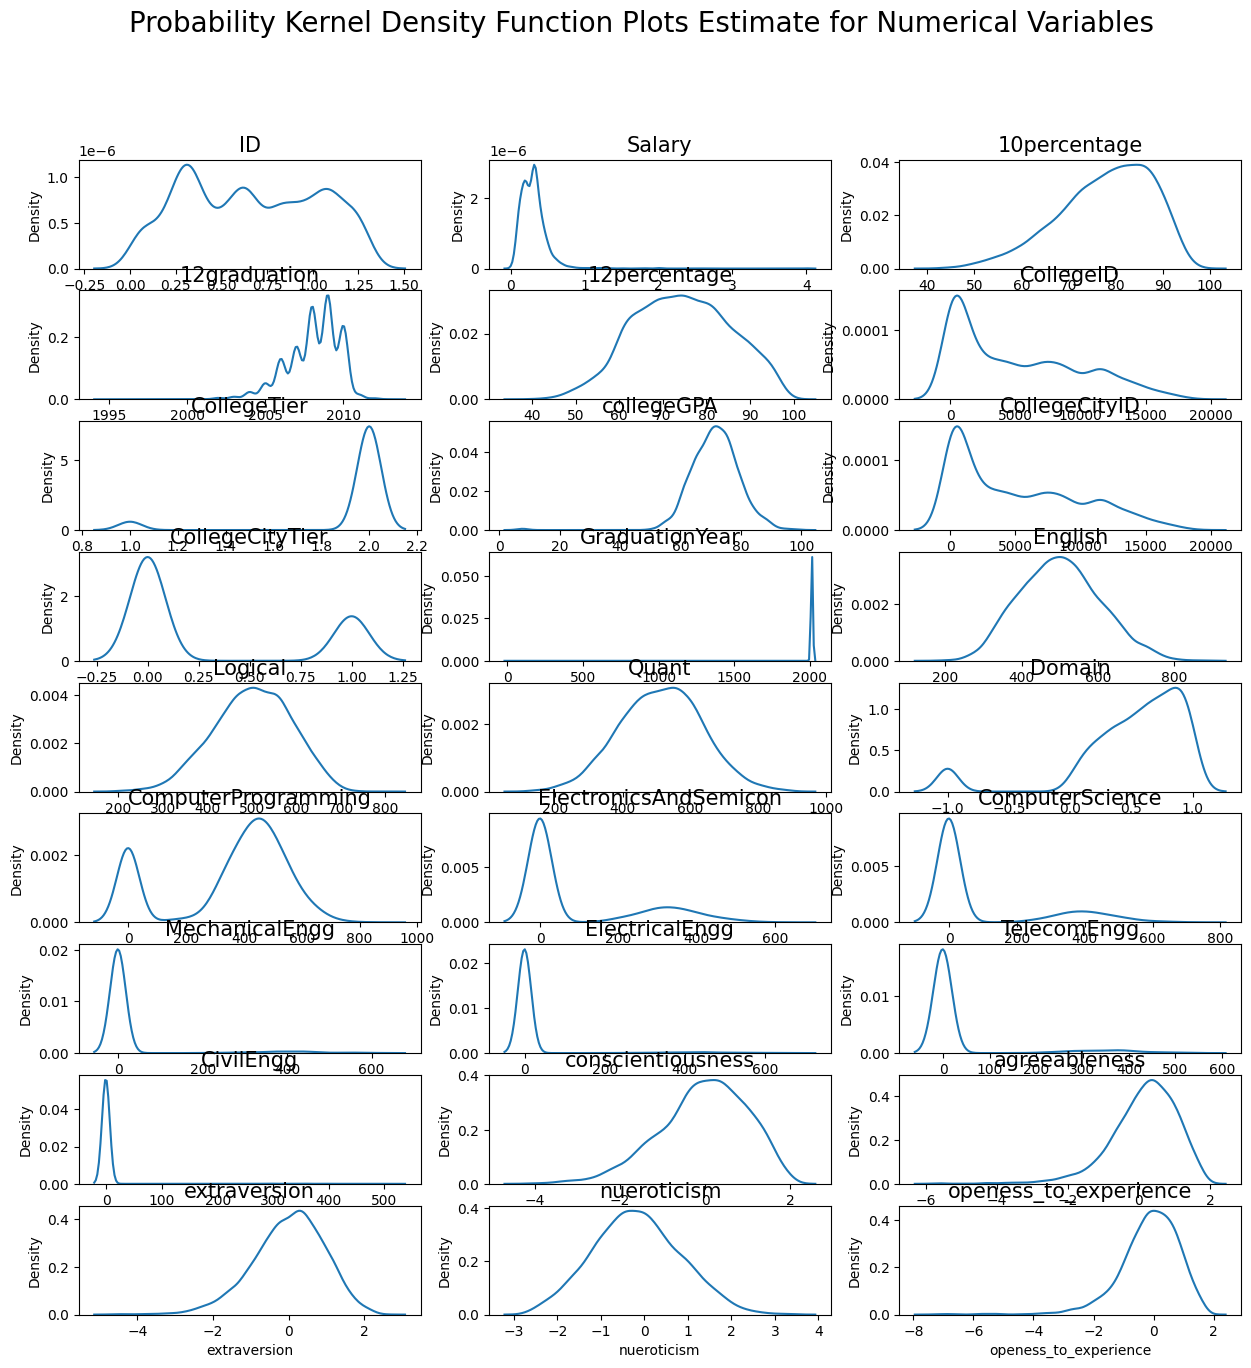

In [9]:
# Create a figure with subplots
num_cols = min(3, len(num_df.columns))
num_rows = (len(num_df.columns) - 1) // num_cols + 1
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15,15))

# Loop over the columns and plot a KDE on each subplot
for i, col in enumerate(num_df):
    row = i // num_cols
    col = i % num_cols
    sns.kdeplot(data=df, x=num_df.columns[i], ax=axes[row, col])
    axes[row, col].set_title(num_df.columns[i], fontsize=15) # Set font size to 15
    
# Add a title to the figure
fig.suptitle('Probability Kernel Density Function Plots Estimate for Numerical Variables', fontsize=20)

# Display the figure
plt.show()

Salary is left skewed, so there is outliers and we need to remove them or log transform
The CollegeTier variable, Computer science,  Graduation year, civilengg, mechanical engg, electricalengg, telecomengg and collegeGPA are leftly skewed distributions. That is they are negatively skwed and needs to be either dropped (if the variable isn't necessary), or they have missing values. There needs to a removal of all outliers in all them. 
Also, some of the variables are positively skewed distributions, that is, they are right skewed.They are: openess to experience, conscientiousness, extraversion, agreeableness, 10percentage, Domain etc.
Finally, about 3 features (English, Logical, and Quant) follow a normal distribution.

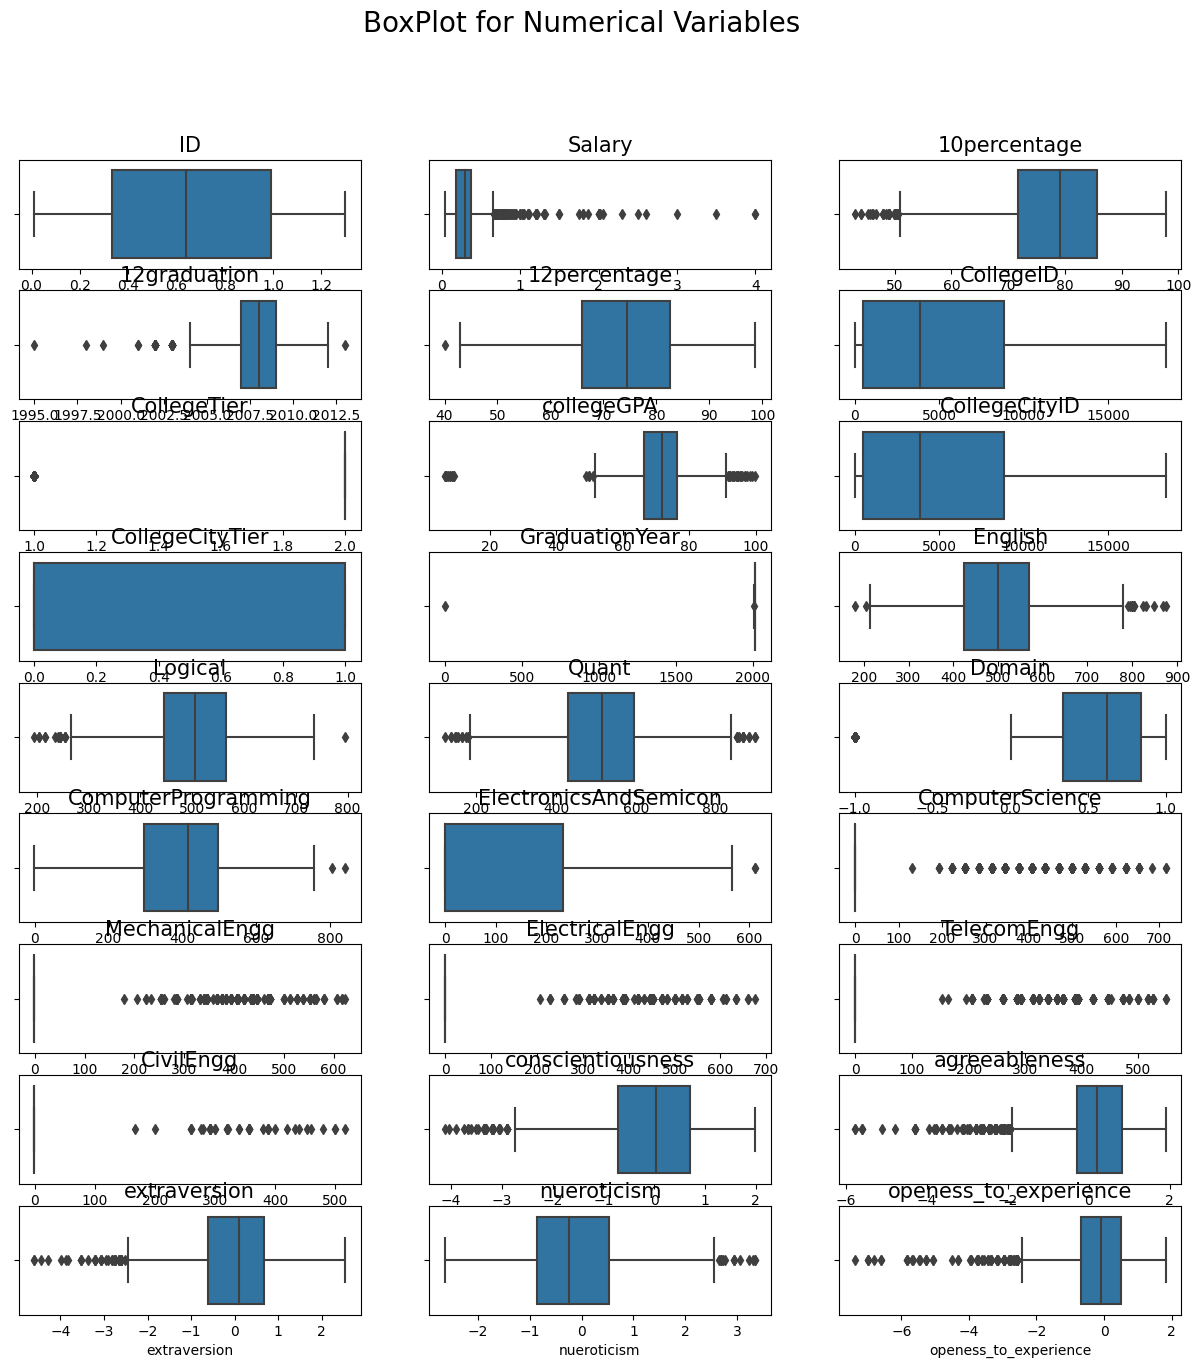

In [10]:
# Create a figure with subplots
num_cols = min(3, len(num_df.columns))
num_rows = (len(num_df.columns) - 1) // num_cols + 1
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15,15))

# Loop over the columns and plot a KDE on each subplot
for i, col in enumerate(num_df):
    row = i // num_cols
    col = i % num_cols
    sns.boxplot(data=df, x=num_df.columns[i], ax=axes[row, col])
    axes[row, col].set_title(num_df.columns[i], fontsize=15) # Set font size to 15
    
# Add a title to the figure
fig.suptitle('BoxPlot for Numerical Variables', fontsize=20)

# Display the figure
plt.show()

The above boxplots indicates that all the technical skills test such as Computer Science, MechanicalEngg, ElectronicalEngg, telelcomengg, and civilengg has too many outliers and should be looked into because they are important in analyzing the employment outcomes of engineering students. Also, the cognitive tests such as English, logical and Quant all follow a normal distibutions. On the other hand, the personality tests some are negativly skewed and the others are positively skewed. Overall, there is need to either drop some of the features because of outliers or work with them

# Bivariate Plots

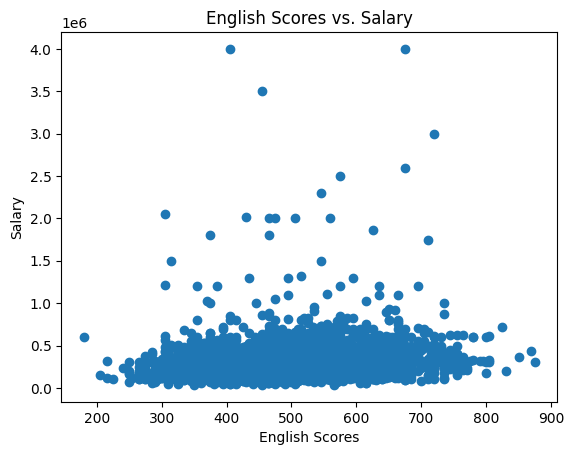

In [11]:
plt.scatter(num_df['English'], num_df['Salary'])
plt.title('English Scores vs. Salary')
plt.xlabel('English Scores')
plt.ylabel('Salary')
plt.show()

The English scores is the x-axis while the salary feature is on the y-axis. The plot aboe doesn't really show a linear relationship between the features. Almost all the English scores centered around 0.5 and 1 lakhs. This result is probably because the salary feature is negatively skewed and needs to treat the outlier. It also indicates that a student that sores over 900 in English test will have a very poor salary. while a student that sores 400 and 700 is likely to be paid very high.

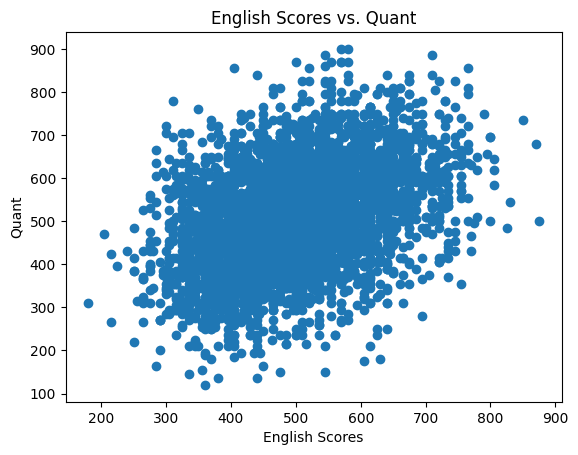

In [12]:
plt.scatter(num_df['English'], num_df['Quant'])
plt.title('English Scores vs. Quant')
plt.xlabel('English Scores')
plt.ylabel('Quant')
plt.show()

The quant feature is the y-axis while the english scores are on the x-axis. This scatterplot above shows a linear relationship between the variables. It shows the higher a student knows quant, the higher the student will perform on the english test and vice versa. However, we see a downward relationship at the very end. 

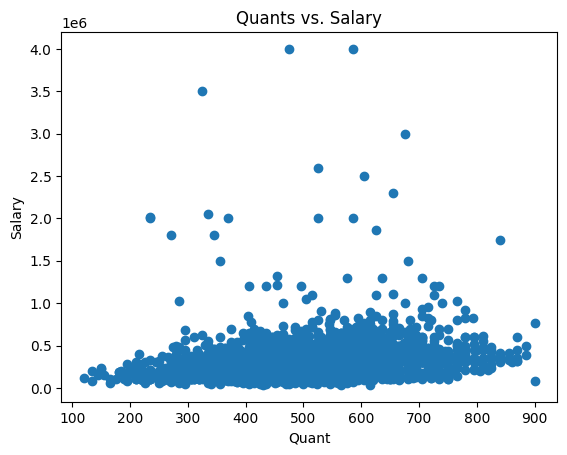

In [13]:
plt.scatter(num_df['Quant'], num_df['Salary'])
plt.title('Quants vs. Salary')
plt.xlabel('Quant')
plt.ylabel('Salary')
plt.show()

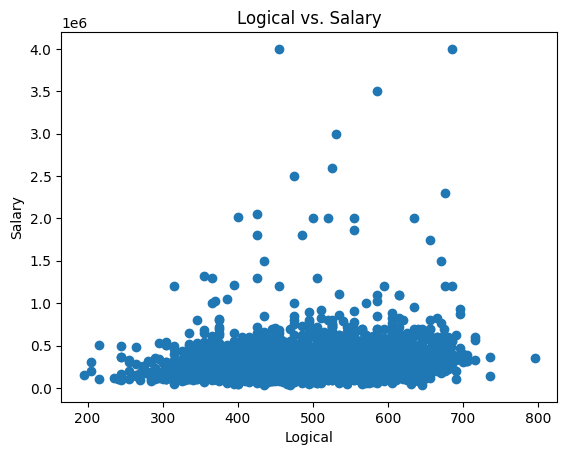

In [14]:
plt.scatter(num_df['Logical'], num_df['Salary'])
plt.title('Logical vs. Salary')
plt.xlabel('Logical')
plt.ylabel('Salary')
plt.show()

It shows that someone with a very high logical thinking skills, doesnt earn much except in a few exceptions which we don't know. Alsow, we see that a student that scored 400 and 700 in the logical thinking test earns more like 4 lakhs. 

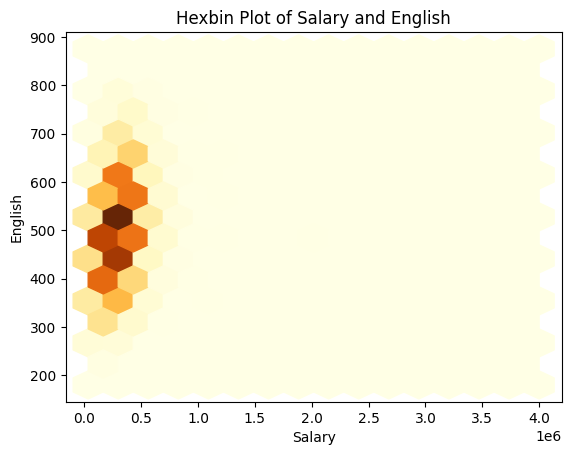

In [16]:
# Extract the salary and English columns from the dataframe
salary = num_df["Salary"]
english = num_df["English"]

# Create a hexbin plot
plt.hexbin(salary, english, gridsize=15, cmap="YlOrBr")

# Add labels and title
plt.xlabel("Salary")
plt.ylabel("English")
plt.title("Hexbin Plot of Salary and English")

# Show the plot
plt.show()


The above hexbin plot shows there is no relationship between salary and english scores. Darker colors indicate higher densities of points in that area, while lighter colors indicate lower densities. The hexbin plot above doesn't show trend or patterns between the salary and english scores. It also shows the presence of outliers in the Salary feature.

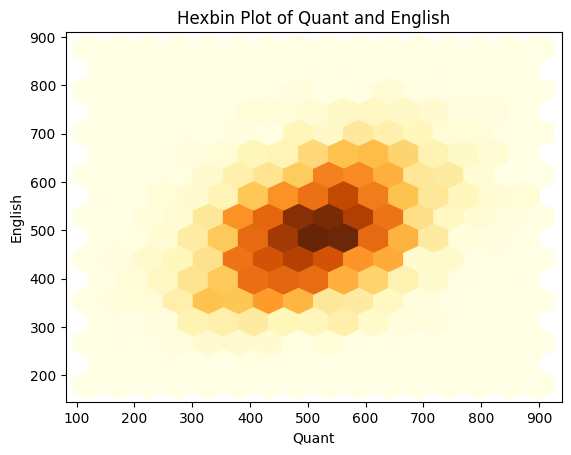

In [17]:
# Extract the salary and English columns from the dataframe
quant = num_df["Quant"]
english = num_df["English"]

# Create a hexbin plot
plt.hexbin(quant, english, gridsize=15, cmap="YlOrBr")

# Add labels and title
plt.xlabel("Quant")
plt.ylabel("English")
plt.title("Hexbin Plot of Quant and English")

# Show the plot
plt.show()

The hexbin rplot above shows a linear relationship between the variables. It shows the higher a student knows quant, the higher the student will perform on the english test and vice versa. However, we see a downward relationship at the very end. finally, darker colors indicate higher densities of points in that area, while lighter colors indicate lower densities

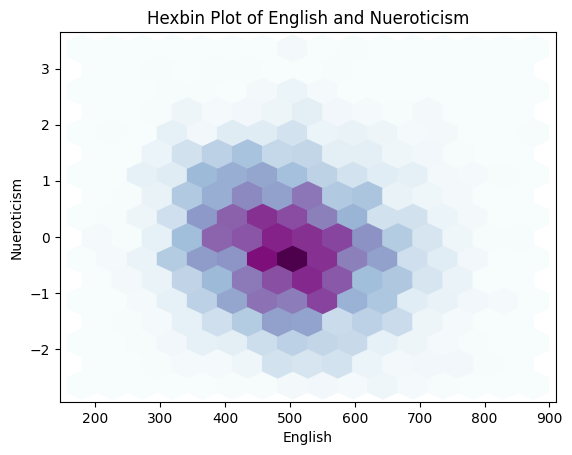

In [18]:
# Extract the salary and English columns from the dataframe
english = num_df["English"]
nueroticism = num_df["nueroticism"]

# Create a hexbin plot
plt.hexbin(english, nueroticism, gridsize=15, cmap="BuPu")

# Add labels and title
plt.xlabel("English")
plt.ylabel("Nueroticism")
plt.title("Hexbin Plot of English and Nueroticism")

# Show the plot
plt.show()

What is Neuroticism? It is a personality trait characterized by a tendency to experience negative emotions such as anxiety, fear, sadness, and worry. People high in neuroticism may be more susceptible to stress and may have a tendency to ruminate on negative thoughts and experiences. It shows that students with Neuroticism tend to score less in the english test.

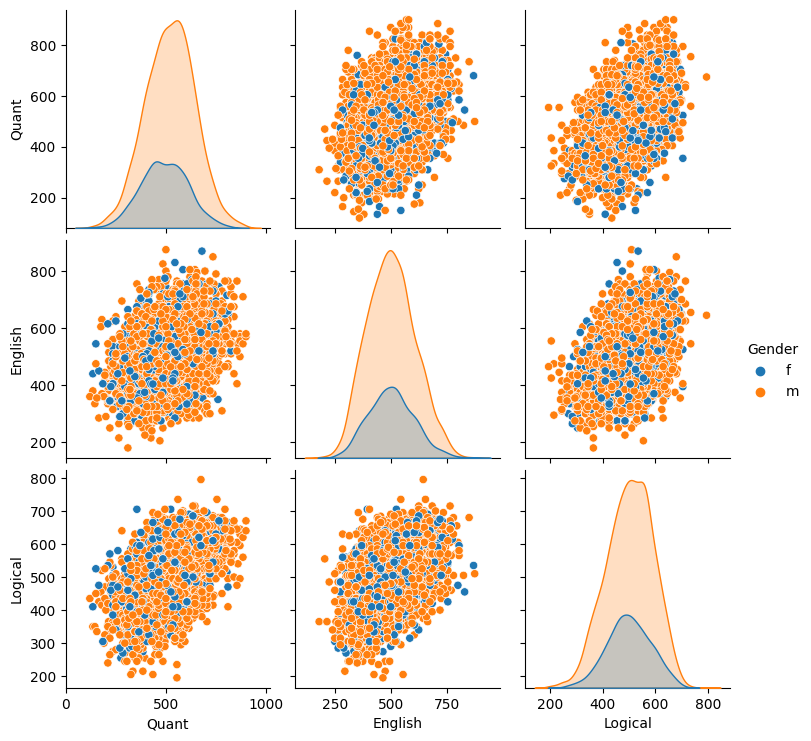

In [19]:
# Create a pairplot
sns.pairplot(df, vars=["Quant", "English", "Logical"], diag_kind="kde", hue ="Gender")


# Show the plot
plt.show()


The pairplot shows a scatter plot matrix for the selected variables and their distributions as kernel density estimates. The plot is divided into a grid where each variable is plotted against every other variable in the grid.

The diagonal of the plot shows the kernel density estimate for each variable, which indicates a normal distribution indicates the KDE plot for males is displaying a longer and/or more spread out distribution than that of the female gender distributions. The off-diagonal plots show the scatter plot of two variables, with each point representing a data point. The hue parameter separates the data points by gender, which allows for the visual inspection of gender differences in the relationships between the variables.
Overall men are well represented and there is more data points in all three features for the male gender.

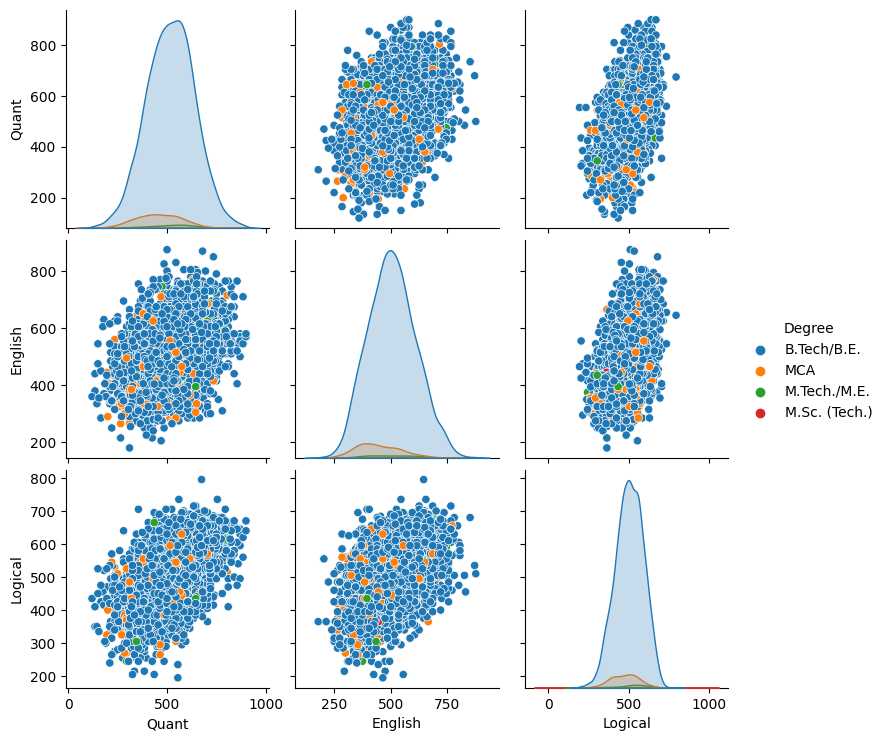

In [20]:
# Create a pairplot
sns.pairplot(df, vars=["Quant", "English", "Logical"], diag_kind="kde", hue ="Degree")


# Show the plot
plt.show()

Interpreting the resulting plot requires looking at each of the individual plots. For example, the scatter plot of Quant vs. English shows a positive correlation between the two variables, with some degree of clustering. The scatter plot of Quant vs. Logical also shows a positive correlation, but with less clustering.

The diagonal plots show the distribution of each variable, with the KDE plot showing a smoothed estimate of the distribution. The KDE plot for Quant shows a bimodal distribution, while the KDE plot for Logical shows a relatively symmetrical unimodal distribution. The KDE plot for English shows a roughly normal distribution.

Looking at the plot with respect to the degree type, we can see that the B.Tech/B.E degree has a wider spread in the scatter plots compared to the other degrees. Additionally, the KDE plot for English shows that the distribution for B.Tech/B.E degree is skewed towards higher scores compared to the other degrees.

Overall, the plot suggests some differences in the relationships between the variables and the distribution of the variables across different degree types.

In [21]:
# Concat the cols we will need for the analysis

new_df = pd.concat([num_df[['Salary', 'Quant', 'English', 'Logical']], cat_df[['Designation', 'JobCity', 'Gender', 'Specialization', 'Degree']]], axis=1)
new_df.head()


,Salary,Quant,English,Logical,Designation,JobCity,Gender,Specialization,Degree
0,420000,525,515,585,senior quality engineer,Bangalore,f,computer engineering,B.Tech/B.E.
1,500000,780,695,610,assistant manager,Indore,m,electronics and communication engineering,B.Tech/B.E.
2,325000,370,615,545,systems engineer,Chennai,f,information technology,B.Tech/B.E.
3,1100000,625,635,585,senior software engineer,Gurgaon,m,computer engineering,B.Tech/B.E.
4,200000,465,545,625,get,Manesar,m,electronics and communication engineering,B.Tech/B.E.


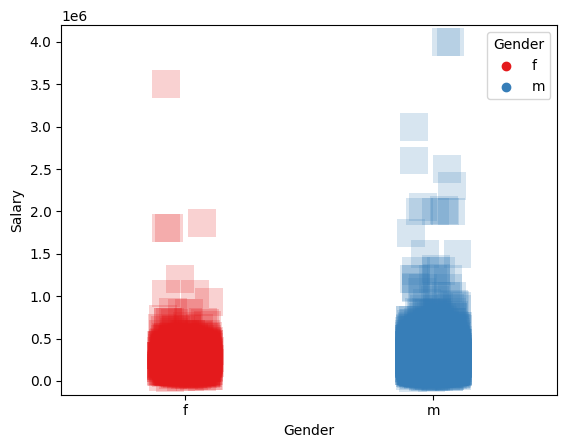

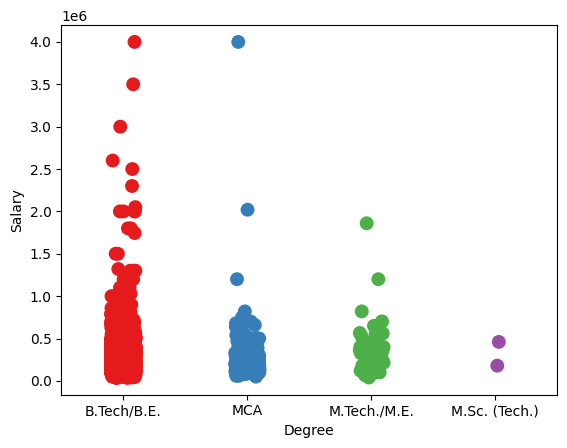

In [22]:
sns.stripplot(x="Gender", y="Salary", hue='Gender',
                  data=new_df, palette="Set1", size=20,
                  marker="s", alpha=0.2)
  
plt.show()


sns.stripplot(x='Degree', y='Salary', data=new_df, palette='Set1', size=10)
plt.show()
  

The first plot shows a strip plot with Gender on the x-axis and Salary on the y-axis. Each data point is represented as a small square (marker="s") with a size of 20. The alpha parameter controls the transparency of the markers, with alpha=0.2 making the markers slightly transparent. The hue parameter is also set to Gender, which means that the markers are color-coded based on gender. The palette parameter specifies the color scheme for the markers.Thus, the majority of the candidates in the dataset are male.

The second plot shows another strip plot, but with Degree on the x-axis and Salary on the y-axis. Each data point is represented as a small circle with a size of 10. The color of the markers represents the different degrees in the dataset.

In both plots, the x-axis represents categorical variables while the y-axis represents a continuous variable. The strip plot shows the distribution of data points along the y-axis for each category on the x-axis. The overlap between the markers can give an indication of the degree of clustering or spread of the data points for each category. Furthermore, B.Tech/B.E has more clusters than all other degrees.

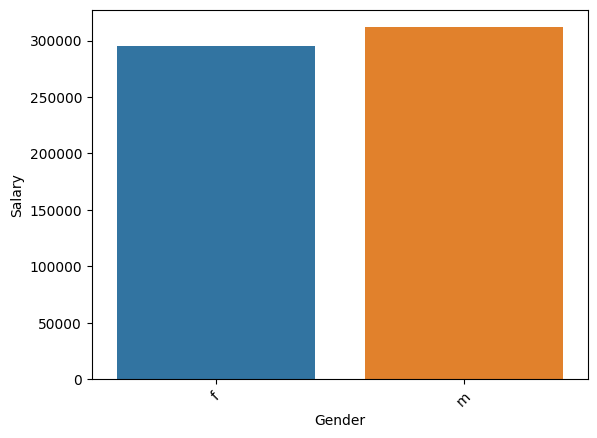

In [23]:
avg_salary_by_gender = new_df.groupby("Gender")["Salary"].mean().reset_index()
sns.barplot(x="Gender", y="Salary", data=avg_salary_by_gender)
plt.xticks(rotation=45)
plt.show()

The interpretation of the bar plot indicates that, on average, there is a slight gender pay gap, with male candidates earning slightly more on average than female candidates.

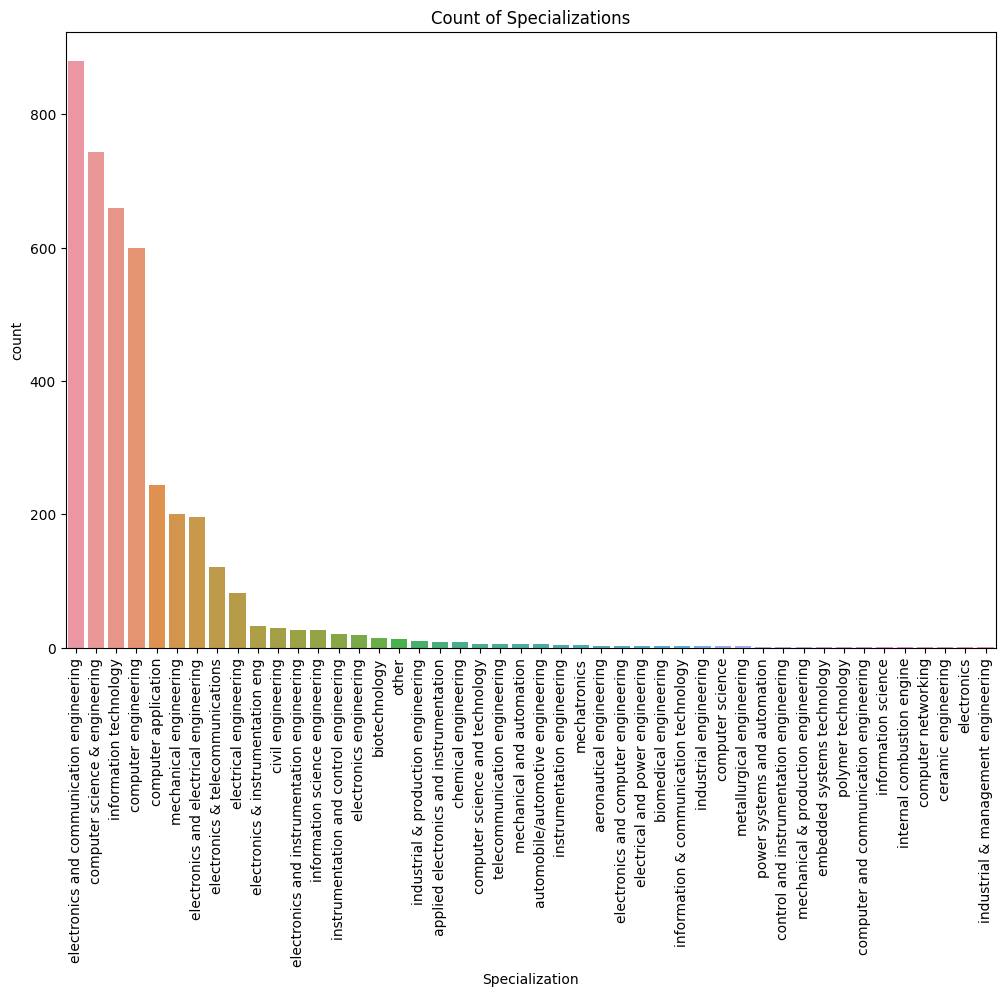

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
sns.countplot(x='Specialization', data=new_df, order = new_df['Specialization'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Count of Specializations')
plt.show()


## Research Questions

1. Times of India article dated Jan 18, 2019 states that “After doing your Computer Science
Engineering if you take up jobs as a Programming Analyst, Software Engineer,
Hardware Engineer and Associate Engineer you can earn up to 2.5-3 lakhs as a fresh
graduate.” 

Test this claim with the data given to you.

2. Is there a relationship between gender and specialisation? (i.e. Does the preference of
Specialisation depend on the Gender?)


## Research Question 1

In [25]:
# Create a subset of the data for Computer Science Engineering graduates
cse_df = new_df[new_df['Degree'] == 'B.Tech/B.E.']

# Filter the subset for job roles of interest
roles = ['Programming Analyst', 'Software Engineer', 'Hardware Engineer', 'Associate Engineer']
subset_df = cse_df[cse_df['Designation'].isin(roles)]

# Calculate the average salary for the subset
average_salary = subset_df['Salary'].mean()

# Compare the average salary with the claimed range
if average_salary >= 35000 and average_salary <= 4000000:
    print("The claim is supported by the data.")
else:
    print("The claim is not supported by the data.")


The claim is not supported by the data.


With the above roles, the candidate can earn between 3.5 and 400 lakhs. Baesd on the above statistics, this claim by times of India is false.

## Research Question 2

In [26]:
# Create a contingency table
contingency_table = pd.crosstab(new_df['Gender'], new_df['Specialization'])

# Perform chi-square test for independence
chi2, pval, dof, expected = chi2_contingency(contingency_table)

# Print the results
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {pval}")
if pval < 0.05:
    print("There is a significant relationship between gender and specialization.")
else:
    print("There is no significant relationship between gender and specialization.")


Chi-square statistic: 104.46891913608455
P-value: 1.2453868176976918e-06
There is a significant relationship between gender and specialization.


Based on the results, the chi-square statistic is 104.47, which indicates that there is a significant relationship or  association between gender and specialization. The p-value is 1.25e-06, which is much smaller than the commonly used significance level of 0.05. Therefore, we reject the null hypothesis and conclude that there is a significant relationship between gender and specialization.

## Other Research questions:

3. What factors (such as degree, specialization, job city, etc.) are most strongly correlated with higher salaries for candidates in this dataset?

4. Is there a significant difference in salary between candidates who have completed a master's degree versus those who only have a bachelor's degree?

5. Are there any significant differences in salary or specialization preferences between different regions in India?

## Research Question 3a

What factors (such as degree, specialization, job city, etc.) are most strongly correlated with higher salaries for candidates in this dataset?

In [27]:
# Create a list of all unique degrees
degrees = new_df['Degree'].unique()

# Initialize an empty list to store results
results = []

# Loop through all degrees and perform Kruskal-Wallis test
for degree in degrees:
    subset = new_df[new_df['Degree'] == degree]['Salary']
    result = kruskal(*subset)
    results.append((degree, result.statistic, result.pvalue))

# Print the results
print(results)

[('B.Tech/B.E.', 3698.999999999999, 0.49690783296276864), ('MCA', 242.00000000000003, 0.4879102951825405), ('M.Tech./M.E.', 52.00000000000003, 0.4739152358516153), ('M.Sc. (Tech.)', 1.0, 0.31731050786291115)]


The results of the Kruskal-Wallis test show the degree categories and their corresponding p-values. 
The p-value for the B.Tech/B.E. category is 0.4969, which suggests that there is no significant difference in salaries 
among the B.Tech/B.E. graduates with different specializations. The p-values for the MCA and M.Tech./M.E. categories are 0.4879
and 0.4739, respectively, indicating that there is no significant difference in salaries among these groups as well. 
The M.Sc. (Tech.) category has a p-value of 0.3173, which is still above the significance level of 0.05, suggesting that there 
is no significant difference in salaries among graduates with this degree.

Overall, the Kruskal-Wallis test did not find any significant differences in salaries among the 
different degree categories in the dataset.

## Research Question 3b

What factors (such as degree, specialization, job city, etc.) are most strongly correlated with higher salaries for candidates in this dataset?

In [28]:
specs = new_df['Specialization'].unique()
results = []

for spec in specs:
    subset = new_df[new_df['Specialization'] == spec]['Salary']
    if len(subset.unique()) > 1:
        result = stats.kruskal(*subset)
        results.append((spec, result.statistic, result.pvalue))

# Print the results
print("Results of Kruskal-Wallis test:")
print("{:<40} {:<20} {:<20}".format("Specialization", "Test Statistic", "P-value"))
for r in results:
    print("{:<40} {:<20} {:<20}".format(r[0], r[1], r[2]))


Results of Kruskal-Wallis test:
Specialization                           Test Statistic       P-value             
computer engineering                     598.9999999999998    0.4923158047134958  
electronics and communication engineering 879.0                0.49365670610791723 
information technology                   659.0000000000001    0.4926739753704504  
computer science & engineering           742.9999999999998    0.4931005279828763  
mechanical engineering                   199.99999999999991   0.486701201720853   
electronics and electrical engineering   194.99999999999991   0.4865317651328138  
electronics & telecommunications         120.00000000000003   0.48283072737061206 
instrumentation and control engineering  19.000000000000004   0.4568361255919618  
computer application                     243.0                0.4879351989590961  
electronics and computer engineering     2.0                  0.36787944117144245 
electrical engineering                   81.0         

Looking at the results, we can see that all of the p-values are greater than 0.05, which suggests that there is not enough evidence to reject the null hypothesis that there are no significant differences in salaries between the different engineering specializations. Therefore, we cannot conclude that any one specialization has a significantly different salary from the others.

## Research Question 4


Is there a significant difference in salary between candidates who have completed a master's degree versus those who only have a bachelor's degree?

In [29]:
import scipy.stats as stats
import numpy as np

bachelor_subset = new_df[new_df['Degree'] == 'B.Tech/B.E.']['Salary']
master_subset = new_df[new_df['Degree'] == 'MCA']['Salary']

if len(bachelor_subset) > 1 and len(master_subset) > 1:
    result = stats.f_oneway(bachelor_subset.values, master_subset.values)
    print("Test statistic: {:.3f}".format(result.statistic))
    print("P-value: {:.3f}".format(result.pvalue))
else:
    print("Insufficient data to perform ANOVA")


Test statistic: 3.957
P-value: 0.047


The test statistic for the one-way ANOVA comparing the salaries of candidates with a Bachelor's degree versus those with a Master's degree is 3.957 and the corresponding p-value is 0.047.

Since the p-value is less than 0.05, which is a common significance level, we can conclude that there is a statistically significant difference in salary between candidates who have completed a master's degree versus those who only have a bachelor's degree.

## Research Question 5

Are there any significant differences in salary or specialization preferences between different cities in India?

In [30]:
from scipy.stats import ttest_ind

top_cities = ['Bangalore', 'Noida', 'Hyderabad', 'Pune', 'Chennai']

for i in range(len(top_cities)):
    for j in range(i+1, len(top_cities)):
        city1 = top_cities[i]
        city2 = top_cities[j]
        subset1 = new_df[new_df['JobCity'] == city1]['Salary']
        subset2 = new_df[new_df['JobCity'] == city2]['Salary']
        t, p = ttest_ind(subset1, subset2, equal_var=False)
        print(f"T-test results for {city1} vs {city2}: t = {t}, p = {p}")


T-test results for Bangalore vs Noida: t = 4.231605811891819, p = 2.6155229571375527e-05
T-test results for Bangalore vs Hyderabad: t = 3.655926186492274, p = 0.00027415323448077737
T-test results for Bangalore vs Pune: t = 1.0829125661140648, p = 0.27942690997884584
T-test results for Bangalore vs Chennai: t = 5.876132642431497, p = 6.2059021634781484e-09
T-test results for Noida vs Hyderabad: t = -0.7880707501422102, p = 0.4309233269372241
T-test results for Noida vs Pune: t = -2.0568048249237285, p = 0.0401761674744243
T-test results for Noida vs Chennai: t = 0.5203307452304888, p = 0.6030216424653196
T-test results for Hyderabad vs Pune: t = -1.5005949481220953, p = 0.13409280955774122
T-test results for Hyderabad vs Chennai: t = 1.5047128250914221, p = 0.1329303800264316
T-test results for Pune vs Chennai: t = 2.6794671296686237, p = 0.00766329022975334


The results of the t-tests indicate that there are significant differences in salary and specialization preferences between different cities in India. For example, the t-tests comparing Bangalore with Noida, Hyderabad, and Chennai all have p-values less than 0.05, indicating that the differences in salaries and specialization preferences between these cities are statistically significant. Similarly, the t-test comparing Noida with Pune has a p-value less than 0.05, indicating a statistically significant difference in salary and specialization preferences between these cities.

However, the t-test comparing Bangalore with Pune has a p-value greater than 0.05, indicating that there is not a statistically significant difference in salary and specialization preferences between these two cities.

In [31]:
import pandas as pd
from scipy import stats

# filter the top 5 specializations
top_specializations = ['electronics and communication engineering', 'computer science & engineering', 
                       'information technology', 'computer engineering', 'computer application']
df_filtered = df[df['Specialization'].isin(top_specializations)]

# perform t-test for each specialization vs. all others
for spec in top_specializations:
    subset = df_filtered[df_filtered['Specialization'] == spec]['Salary']
    others = df_filtered[df_filtered['Specialization'] != spec]['Salary']
    result = stats.ttest_ind(subset, others)
    print(f"t-test result for {spec} vs. all others: {result}")

t-test result for electronics and communication engineering vs. all others: Ttest_indResult(statistic=-1.8596317758037613, pvalue=0.06303151792673835)
t-test result for computer science & engineering vs. all others: Ttest_indResult(statistic=-4.4939703264084185, pvalue=7.2443968279068505e-06)
t-test result for information technology vs. all others: Ttest_indResult(statistic=0.03766324428340836, pvalue=0.969958586914776)
t-test result for computer engineering vs. all others: Ttest_indResult(statistic=8.459116704439307, pvalue=4.078231382855374e-17)
t-test result for computer application vs. all others: Ttest_indResult(statistic=-2.1102907138199525, pvalue=0.034912568395417336)


N.B: All others means `Top 5 specializations`.

These t-test results compare the mean salaries of specific engineering specializations with the mean salaries of the top 5 specializations.

For electronics and communication engineering vs. all others, the t-test result shows a statistic of -1.86 and a p-value of 0.063, which suggests that there may be a small difference in salary between electronics and communication engineering and all other specializations, but the difference is not statistically significant at the typical significance level of 0.05.

For computer science & engineering vs. all others, the t-test result shows a statistic of -4.49 and a very low p-value of 7.24e-06, which indicates that there is a statistically significant difference in salary between computer science & engineering and all other specializations.

For information technology vs. all others, the t-test result shows a statistic of 0.04 and a high p-value of 0.97, which suggests that there is no statistically significant difference in salary between information technology and all other specializations.

For computer engineering vs. all others, the t-test result shows a statistic of 8.46 and an extremely low p-value of 4.08e-17, which indicates that there is a statistically significant difference in salary between computer engineering and all other specializations.

For computer application vs. all others, the t-test result shows a statistic of -2.11 and a p-value of 0.035, which suggests that there may be a small difference in salary between computer application and all other specializations, but the difference is only marginally statistically significant at the typical significance level of 0.05.

## Research Question 6

Are there any significant differences in the average salaries or specialization preferences of male and female candidates after controlling for other variables such as degree and job city?

In [32]:
new_df.JobCity.value_counts()

Bangalore           627
-1                  461
Noida               368
Hyderabad           335
Pune                290
                   ... 
Tirunelvelli          1
Ernakulam             1
Nanded                1
Dharmapuri            1
Asifabadbanglore      1
Name: JobCity, Length: 339, dtype: int64

In [33]:
from scipy.stats import f_oneway

def f_test(data1, data2, data3, data4, data5):
    stat, p = f_oneway(data1, data2, data3, data4, data5)
    print('Test statistic: %.3f' % stat)
    print('P-value: %.3f' % p)
    
# Example usage:
salary_bangalore = new_df[new_df['JobCity'] == 'Bangalore']['Salary']
salary_noida = new_df[new_df['JobCity'] == 'Noida']['Salary']
salary_hyderaba = new_df[new_df['JobCity'] == 'Hyderabad']['Salary']
salary_pune = new_df[new_df['JobCity'] == 'Pune']['Salary']
salary_chennai = new_df[new_df['JobCity'] == 'Chennai']['Salary']

f_test(salary_bangalore, salary_noida, salary_hyderaba, salary_pune, salary_chennai)


Test statistic: 8.005
P-value: 0.000


The F-test result shows the statistical significance of the difference in means of the salaries among the different job cities.

* The test statistic value of 8.005 means that there is a significant difference in means among the different job cities.

* The p-value of 0.000 indicates that the probability of observing such a difference in means by chance is very low (less than 0.05 or 5%).

* Therefore, we can reject the null hypothesis that there is no significant difference in the mean salaries of the different job cities, and conclude that there is a statistically significant difference in salaries among the different job cities in India.